In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']
start_date = '2015-01-01'  # Start date 8 years ago
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

stock_data = yf.download(stocks, start=start_date, end=end_date)

# Save data to a CSV file in the root of your Google Drive
save_path = '/content/drive/My Drive/stock_data_up_to_today.csv'

# Save data to a CSV file
stock_data.to_csv(save_path)

print("Data has been fetched and saved.")


[*********************100%***********************]  5 of 5 completed
Data has been fetched and saved.


In [ ]:
import pandas as pd

# Specify the path to the CSV file in your Google Drive
file_path = '/content/drive/My Drive/stock_data_up_to_today.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

print(data.head())
print(data.describe())
print(data['Close'])
!pip install qgrid
import qgrid

# Display the data as an interactive table
qgrid_widget = qgrid.show_grid(data, show_toolbar=True)
qgrid_widget


   Unnamed: 0           Adj Close        Adj Close.1        Adj Close.2  \
0         NaN         HDFCBANK.NS       ICICIBANK.NS            INFY.NS   
1        Date                 NaN                NaN                NaN   
2  2015-01-01  446.35650634765625   292.403564453125  392.7296447753906   
3  2015-01-02   452.5685729980469  300.7034606933594  400.4472961425781   
4  2015-01-05  448.74761962890625  301.3258056640625  397.0062561035156   

         Adj Close.3         Adj Close.4               Close  \
0        RELIANCE.NS              TCS.NS         HDFCBANK.NS   
1                NaN                 NaN                 NaN   
2  417.9889221191406   1065.138916015625   476.0249938964844   
3  416.8826599121094   1079.323486328125   482.6499938964844   
4  412.3162536621094  1062.9212646484375  478.57501220703125   

             Close.1             Close.2             Close.3  ...  \
0       ICICIBANK.NS             INFY.NS         RELIANCE.NS  ...   
1                NaN      

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

[*********************100%***********************]  1 of 1 completed


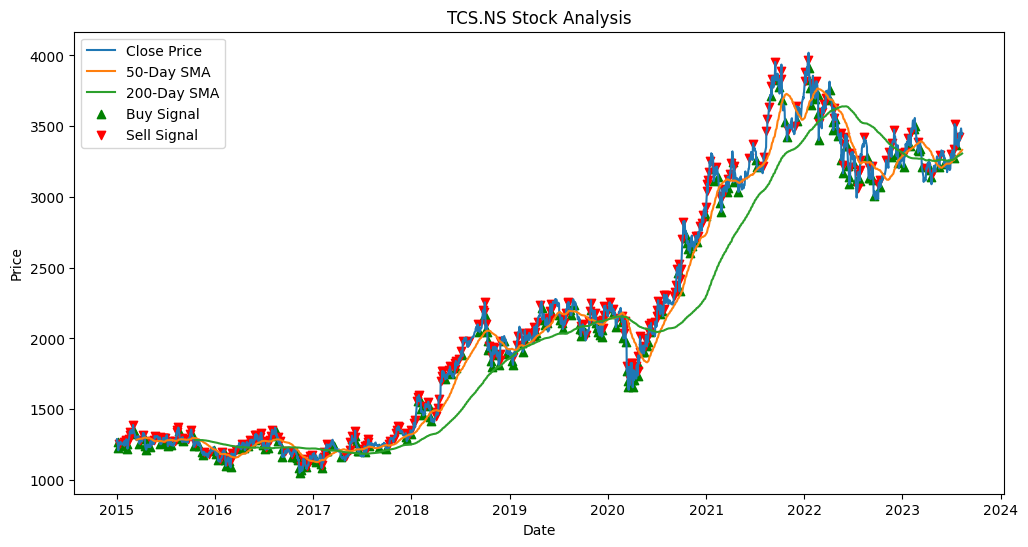

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the stock symbol
stock_symbol = 'TCS.NS'

# Set up data retrieval
start_date = '2015-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Download historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate 50-day and 200-day moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data)

# Set simple thresholds
buy_threshold = -1.5  # Example: buy if the price is 1.5% lower than the previous day's close
sell_threshold = 1.5  # Example: sell if the price is 1.5% higher than the previous day's close

# Calculate buy/sell signals based on thresholds
stock_data['Signal'] = 0  # 0: Hold, 1: Buy, -1: Sell
stock_data.loc[stock_data['Close'].pct_change() < buy_threshold / 100, 'Signal'] = 1
stock_data.loc[stock_data['Close'].pct_change() > sell_threshold / 100, 'Signal'] = -1

# Visualization: Historical Prices, Moving Averages, and Buy/Sell Signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-Day SMA')
plt.plot(stock_data.index, stock_data['SMA200'], label='200-Day SMA')
plt.scatter(stock_data[stock_data['Signal'] == 1].index, stock_data[stock_data['Signal'] == 1]['Close'], color='green', label='Buy Signal', marker='^')
plt.scatter(stock_data[stock_data['Signal'] == -1].index, stock_data[stock_data['Signal'] == -1]['Close'], color='red', label='Sell Signal', marker='v')
plt.title(f'{stock_symbol} Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Available stocks:
1. TCS.NS
2. RELIANCE.NS
3. HDFCBANK.NS
4. INFY.NS
5. ICICIBANK.NS
Select a stock (1-5): 2
Enter start date (YYYY-MM-DD): 2017-06-12
Enter end date (YYYY-MM-DD): 2023-02-20
[*********************100%***********************]  1 of 1 completed


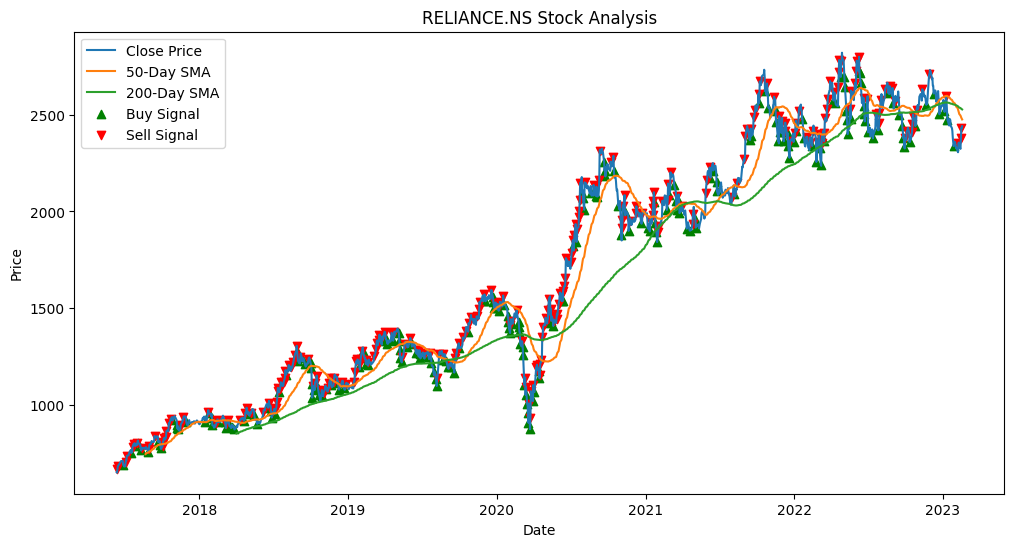

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# List of available stocks
available_stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']

# Input: Select stock
print("Available stocks:")
for i, stock in enumerate(available_stocks):
    print(f"{i + 1}. {stock}")
stock_choice = int(input("Select a stock (1-5): ")) - 1
selected_stock = available_stocks[stock_choice]

# Input: Date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Download historical stock data
stock_data = yf.download(selected_stock, start=start_date, end=end_date)

# Calculate 50-day and 200-day moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data)

# Set simple thresholds
buy_threshold = -1.5  # Example: buy if the price is 1.5% lower than the previous day's close
sell_threshold = 1.5  # Example: sell if the price is 1.5% higher than the previous day's close

# Calculate buy/sell signals based on thresholds
stock_data['Signal'] = 0  # 0: Hold, 1: Buy, -1: Sell
stock_data.loc[stock_data['Close'].pct_change() < buy_threshold / 100, 'Signal'] = 1
stock_data.loc[stock_data['Close'].pct_change() > sell_threshold / 100, 'Signal'] = -1

# Visualization: Historical Prices, Moving Averages, and Buy/Sell Signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-Day SMA')
plt.plot(stock_data.index, stock_data['SMA200'], label='200-Day SMA')
plt.scatter(stock_data[stock_data['Signal'] == 1].index, stock_data[stock_data['Signal'] == 1]['Close'], color='green', label='Buy Signal', marker='^')
plt.scatter(stock_data[stock_data['Signal'] == -1].index, stock_data[stock_data['Signal'] == -1]['Close'], color='red', label='Sell Signal', marker='v')
plt.title(f'{selected_stock} Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Define the time horizon for labeling (e.g., 5 trading days)
time_horizon = 5

# Initialize the 'Label' column with zeros (Hold)
stock_data['Label'] = 0

# Assign labels based on buy and sell signals
for i in range(len(stock_data) - time_horizon):
    future_close = stock_data['Close'].iloc[i + time_horizon]
    current_close = stock_data['Close'].iloc[i]
    if stock_data['Signal'].iloc[i] == 1:  # Buy signal
        if future_close > current_close * 1.02:  # Price increase by 2% or more
            stock_data.at[stock_data.index[i], 'Label'] = 1
        elif future_close < current_close * 0.98:  # Price decrease by 2% or more
            stock_data.at[stock_data.index[i], 'Label'] = -1

# Display labeled data
print(stock_data)


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-06-12   657.046875   658.631836   652.316711   653.530212   634.886658   
2017-06-13   654.099792   657.269714   649.344849   651.004150   632.432739   
2017-06-14   651.771851   673.614807   651.771851   672.376526   653.195312   
2017-06-15   673.614807   690.950500   673.169006   685.477356   665.922546   
2017-06-16   688.028198   691.346741   678.221130   687.879578   668.256165   
...                 ...          ...          ...          ...          ...   
2023-02-13  2340.199951  2350.000000  2313.550049  2323.350098  2323.350098   
2023-02-14  2329.949951  2381.899902  2323.649902  2378.100098  2378.100098   
2023-02-15  2376.000000  2437.199951  2373.000000  2431.949951  2431.949951   
2023-02-16  2449.449951  2463.800049  2425.050049  2430.050049  2430.050049   
2023-02-17  2420.000000  2447.500000  2410.600098  2

Available stocks:
1. TCS.NS
2. RELIANCE.NS
3. HDFCBANK.NS
4. INFY.NS
5. ICICIBANK.NS
Select a stock (1-5): 4
Enter start date (YYYY-MM-DD): 2020-02-20
Enter end date (YYYY-MM-DD): 2023-02-20
[*********************100%***********************]  1 of 1 completed


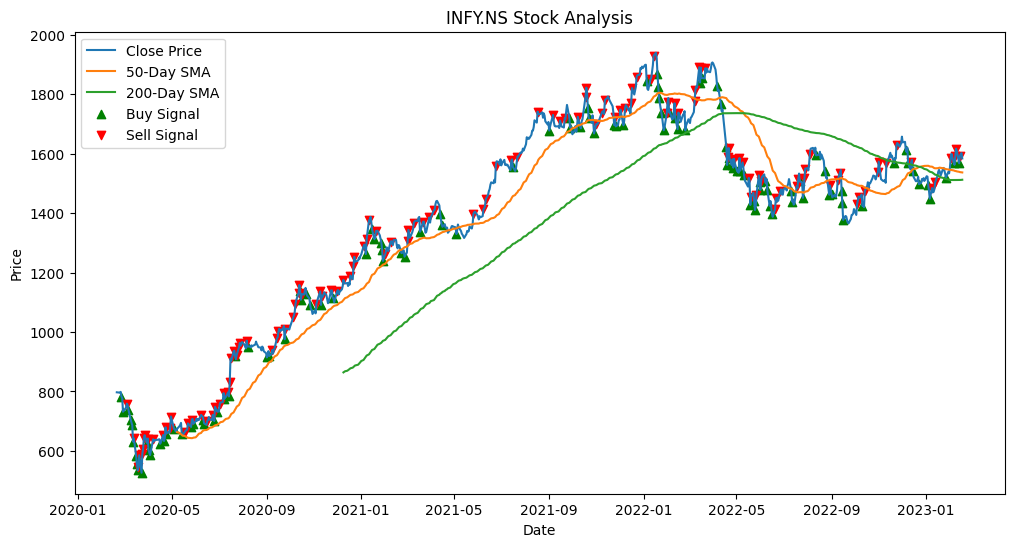

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-02-20   803.250000   806.099976   793.849976   797.000000   727.034119   
2020-02-24   800.099976   811.599976   792.150024   795.849976   725.985046   
2020-02-25   799.000000   806.000000   795.400024   798.400024   728.311279   
2020-02-26   793.950012   801.450012   780.500000   782.750000   714.035095   
2020-02-27   778.000000   780.750000   772.200012   777.849976   709.565247   
...                 ...          ...          ...          ...          ...   
2023-02-13  1597.000000  1597.000000  1566.000000  1567.449951  1526.130127   
2023-02-14  1584.699951  1596.000000  1578.150024  1593.250000  1551.249878   
2023-02-15  1584.000000  1599.000000  1576.000000  1597.050049  1554.949829   
2023-02-16  1600.000000  1614.449951  1597.849976  1601.800049  1559.574585   
2023-02-17  1594.000000  1595.000000  1575.500000  1

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# List of available stocks
available_stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']

# Input: Select stock
print("Available stocks:")
for i, stock in enumerate(available_stocks):
    print(f"{i + 1}. {stock}")
stock_choice = int(input("Select a stock (1-5): ")) - 1
selected_stock = available_stocks[stock_choice]

# Input: Date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Download historical stock data
stock_data = yf.download(selected_stock, start=start_date, end=end_date)

# Calculate 50-day and 200-day moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data)

# Set simple thresholds
buy_threshold = -1.5  # Example: buy if the price is 1.5% lower than the previous day's close
sell_threshold = 1.5  # Example: sell if the price is 1.5% higher than the previous day's close

# Calculate buy/sell signals based on thresholds
stock_data['Signal'] = 0  # 0: Hold, 1: Buy, -1: Sell
stock_data.loc[stock_data['Close'].pct_change() < buy_threshold / 100, 'Signal'] = 1
stock_data.loc[stock_data['Close'].pct_change() > sell_threshold / 100, 'Signal'] = -1

# Visualization: Historical Prices, Moving Averages, and Buy/Sell Signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-Day SMA')
plt.plot(stock_data.index, stock_data['SMA200'], label='200-Day SMA')
plt.scatter(stock_data[stock_data['Signal'] == 1].index, stock_data[stock_data['Signal'] == 1]['Close'], color='green', label='Buy Signal', marker='^')
plt.scatter(stock_data[stock_data['Signal'] == -1].index, stock_data[stock_data['Signal'] == -1]['Close'], color='red', label='Sell Signal', marker='v')
plt.title(f'{selected_stock} Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Define the time horizon for labeling (e.g., 5 trading days)
time_horizon = 5

# Initialize the 'Label' column with zeros (Hold)
stock_data['Label'] = 0

# Assign labels based on buy and sell signals
for i in range(len(stock_data) - time_horizon):
    future_close = stock_data['Close'].iloc[i + time_horizon]
    current_close = stock_data['Close'].iloc[i]
    if stock_data['Signal'].iloc[i] == 1:  # Buy signal
        if future_close > current_close * 1.02:  # Price increase by 2% or more
            stock_data.at[stock_data.index[i], 'Label'] = 1
        elif future_close < current_close * 0.98:  # Price decrease by 2% or more
            stock_data.at[stock_data.index[i], 'Label'] = -1

# Display labeled data
print(stock_data)


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# List of available stocks
available_stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']

# Input: Select stock
print("Available stocks:")
for i, stock in enumerate(available_stocks):
    print(f"{i + 1}. {stock}")
stock_choice = int(input("Select a stock (1-5): ")) - 1
selected_stock = available_stocks[stock_choice]

# Input: Date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Download historical stock data
stock_data = yf.download(selected_stock, start=start_date, end=end_date)

# Calculate 50-day and 200-day moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate labels based on moving averages
stock_data['Label'] = 'Hold'
stock_data.loc[stock_data['SMA50'] > stock_data['SMA200'], 'Label'] = 'Buy'
stock_data.loc[stock_data['SMA50'] < stock_data['SMA200'], 'Label'] = 'Sell'

# Get the last label
last_label = stock_data['Label'].iloc[-1]

# Display result
print(f"Recommendation: {last_label}")


Available stocks:
1. TCS.NS
2. RELIANCE.NS
3. HDFCBANK.NS
4. INFY.NS
5. ICICIBANK.NS
Select a stock (1-5): 5
Enter start date (YYYY-MM-DD): 2021-05-28
Enter end date (YYYY-MM-DD): 2023-05-28
[*********************100%***********************]  1 of 1 completed
Recommendation: Buy


Available stocks:
1. TCS.NS
2. RELIANCE.NS
3. HDFCBANK.NS
4. INFY.NS
5. ICICIBANK.NS
Select a stock (1-5): 3
Enter start date (YYYY-MM-DD): 2020-06-05
Enter end date (YYYY-MM-DD): 2023-06-05
[*********************100%%**********************]  1 of 1 completed
Recommendation: Buy
Available stocks:
1. TCS.NS
2. RELIANCE.NS
3. HDFCBANK.NS
4. INFY.NS
5. ICICIBANK.NS
Select a stock (1-5): 3
Enter start date (YYYY-MM-DD): 2020-06-05
Enter end date (YYYY-MM-DD): 2023-06-05
[*********************100%%**********************]  1 of 1 completed


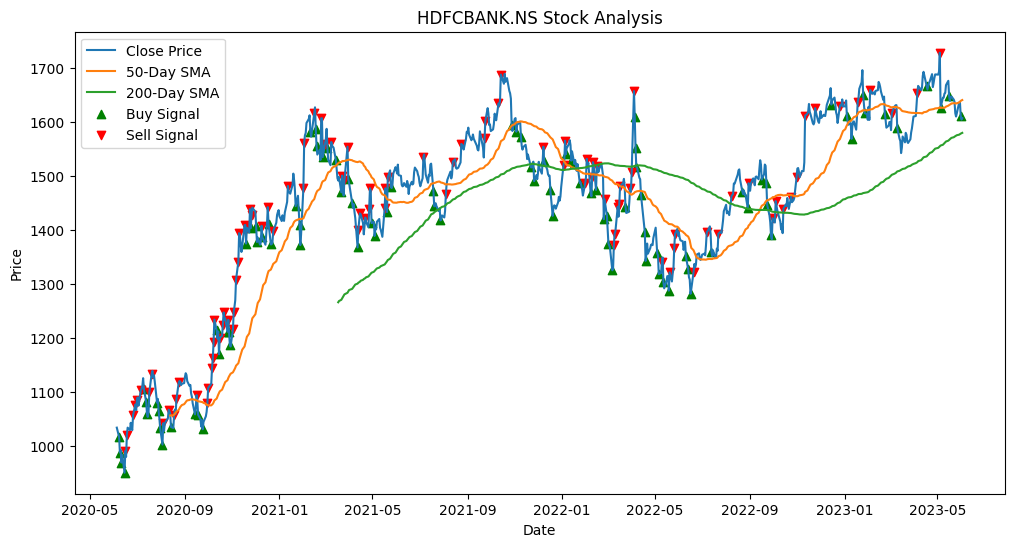

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-06-05  1003.099976  1042.400024  1002.799988  1033.349976  1005.539978   
2020-06-08  1060.000000  1066.650024  1006.400024  1015.900024   988.559631   
2020-06-09  1020.000000  1026.750000   979.549988   987.299988   960.729309   
2020-06-10   990.000000   999.849976   978.200012   991.849976   965.156860   
2020-06-11   985.000000   988.400024   965.000000   968.599976   942.532532   
...                 ...          ...          ...          ...          ...   
2023-05-29  1628.500000  1641.000000  1624.849976  1635.500000  1635.500000   
2023-05-30  1633.599976  1642.650024  1628.550049  1636.750000  1636.750000   
2023-05-31  1629.900024  1634.949951  1604.650024  1610.849976  1610.849976   
2023-06-01  1619.900024  1619.900024  1600.000000  1604.000000  1604.000000   
2023-06-02  1612.449951  1614.800049  1601.000000  1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

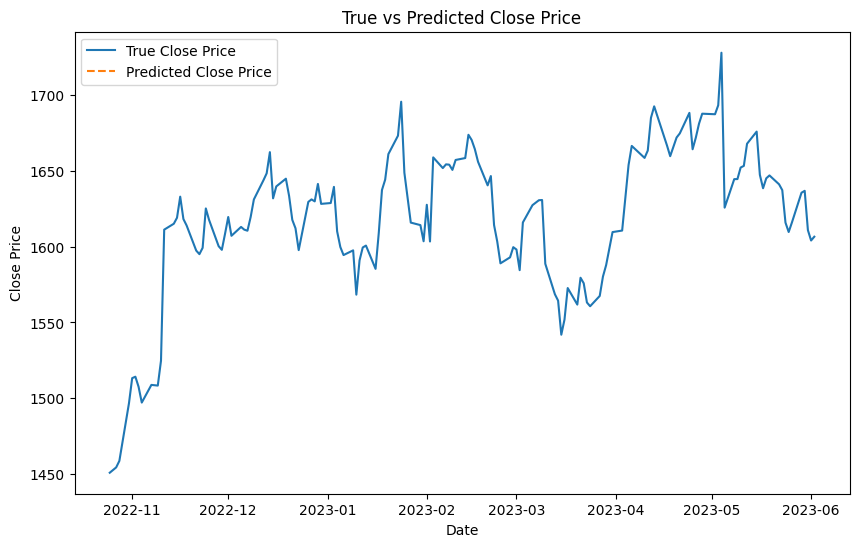

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import pandas as pd
from datetime import datetime

# List of available stocks
available_stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']

# Input: Select stock
print("Available stocks:")
for i, stock in enumerate(available_stocks):
    print(f"{i + 1}. {stock}")
stock_choice = int(input("Select a stock (1-5): ")) - 1
selected_stock = available_stocks[stock_choice]

# Input: Date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Download historical stock data
stock_data = yf.download(selected_stock, start=start_date, end=end_date)

# Calculate 50-day and 200-day moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate labels based on moving averages
stock_data['Label'] = 'Hold'
stock_data.loc[stock_data['SMA50'] > stock_data['SMA200'], 'Label'] = 'Buy'
stock_data.loc[stock_data['SMA50'] < stock_data['SMA200'], 'Label'] = 'Sell'

# Get the last label
last_label = stock_data['Label'].iloc[-1]

# Display result
print(f"Recommendation: {last_label}")
# List of available stocks
available_stocks = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']

# Input: Select stock
print("Available stocks:")
for i, stock in enumerate(available_stocks):
    print(f"{i + 1}. {stock}")
stock_choice = int(input("Select a stock (1-5): ")) - 1
selected_stock = available_stocks[stock_choice]

# Input: Date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Download historical stock data
stock_data = yf.download(selected_stock, start=start_date, end=end_date)

# Calculate 50-day and 200-day moving averages
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data)

# Set simple thresholds
buy_threshold = -1.5  # Example: buy if the price is 1.5% lower than the previous day's close
sell_threshold = 1.5  # Example: sell if the price is 1.5% higher than the previous day's close

# Calculate buy/sell signals based on thresholds
stock_data['Signal'] = 0  # 0: Hold, 1: Buy, -1: Sell
stock_data.loc[stock_data['Close'].pct_change() < buy_threshold / 100, 'Signal'] = 1
stock_data.loc[stock_data['Close'].pct_change() > sell_threshold / 100, 'Signal'] = -1

# Visualization: Historical Prices, Moving Averages, and Buy/Sell Signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-Day SMA')
plt.plot(stock_data.index, stock_data['SMA200'], label='200-Day SMA')
plt.scatter(stock_data[stock_data['Signal'] == 1].index, stock_data[stock_data['Signal'] == 1]['Close'], color='green', label='Buy Signal', marker='^')
plt.scatter(stock_data[stock_data['Signal'] == -1].index, stock_data[stock_data['Signal'] == -1]['Close'], color='red', label='Sell Signal', marker='v')
plt.title(f'{selected_stock} Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Define the time horizon for labeling (e.g., 5 trading days)
time_horizon = 5

# Initialize the 'Label' column with zeros (Hold)
stock_data['Label'] = 0

# Assign labels based on buy and sell signals
for i in range(len(stock_data) - time_horizon):
    future_close = stock_data['Close'].iloc[i + time_horizon]
    current_close = stock_data['Close'].iloc[i]
    if stock_data['Signal'].iloc[i] == 1:  # Buy signal
        if future_close > current_close * 1.02:  # Price increase by 2% or more
            stock_data.at[stock_data.index[i], 'Label'] = 1
        elif future_close < current_close * 0.98:  # Price decrease by 2% or more
            stock_data.at[stock_data.index[i], 'Label'] = -1

# Display labeled data
print(stock_data)
# Load and preprocess data
# ... (similar to previous data loading and preprocessing steps)

# Split data into training and testing sets
train_size = int(len(stock_data) * 0.8)
train_data, test_data = stock_data[:train_size], stock_data[train_size:]

# Build and train ARIMA model
model = ARIMA(train_data['Close'], order=(5, 1, 0))  # Example order parameters
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Create a DataFrame to store predictions with the correct date index
predictions_df = pd.DataFrame(predictions, index=test_data.index, columns=['Predicted_Close'])

# Calculate RMSE using the original test_data['Close'] and predictions
rmse = mean_squared_error(test_data['Close'], predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='True Close Price')
plt.plot(predictions_df.index, predictions_df['Predicted_Close'], label='Predicted Close Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('True vs Predicted Close Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Upload your data files using the "Files" tab on the left side of Colab
# After uploading, you can access them using their names
# For example, if you uploaded "stock_data.csv" and "news_sentiment_scores.csv"
# you can use their names to load them like this:
# stock_data = pd.read_csv('stock_data.csv')
# news_sentiment_scores = pd.read_csv('news_sentiment_scores.csv')

# Load your stock data and news sentiment scores
stock_data = pd.read_csv('stock_data_up_to_today.csv')  # Replace with the actual file name
news_sentiment_scores = pd.read_csv('news_sentiment_scores.csv')  # Replace with the actual file name

# Load your stock data and news sentiment scores
stock_data = pd.read_csv('/content/drive/MyDrive/stock_data_up_to_today.csv')
news_sentiment_scores = pd.read_csv('/content/drive/MyDrive/news_sentiment_scores.csv')

# Merge news sentiment scores with stock price data
merged_data = pd.merge(stock_data, news_sentiment_scores, left_index=True, right_index=True, how='left')

# Feature Engineering: Include sentiment scores as a feature
X = merged_data[['Close', 'Sentiment_Score']]  # Replace with relevant features
y = merged_data['Close']

# Split the data into train and test sets
train_size = int(0.8 * len(X))
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Hyperparameter Tuning
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

best_rmse = float('inf')
best_params = None

# Perform grid search
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train_y, order=(p, d, q))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test_X))

        rmse = mean_squared_error(test_y, predictions, squared=False)

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)
    except:
        continue

print(f"Best RMSE: {best_rmse:.2f} with (p, d, q) = {best_params}")

# Train and evaluate the model with the best parameters
model = ARIMA(train_y, order=best_params)
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test_X))

rmse = mean_squared_error(test_y, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE) with sentiment scores: {rmse:.2f}")


FileNotFoundError: ignored